In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
dt=0.01
num_steps=10000

In [4]:
xs=np.empty(num_steps+1)
ys=np.empty(num_steps+1)
zs=np.empty(num_steps+1)

In [5]:
xs[0],ys[0],zs[0]=(0.1,1,1.05)

In [6]:
s=10
r=28
b=2.2667
for i in range(num_steps):
    xs[i+1]=xs[i]+(s*(ys[i]-xs[i])*dt)
    ys[i+1]=ys[i]+((xs[i]*(r-zs[i])-ys[i])*dt)
    zs[i+1]=zs[i]+((xs[i]*ys[i]-b*zs[i])*dt)
    

C:\Users\sonal\AppData\Local\Temp\ipykernel_2004\2126950120.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


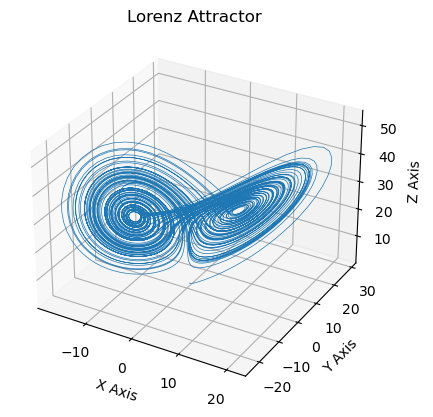

In [7]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot(xs,ys,zs,lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

this system is completely deterministic and unpredictable that's why it's chaotic

# Generating secret keys with chaos: encryption using logistic maps in python

In [8]:
def keygenerate(x,r,size):
    key=[]
    for i in range(size):
        x=r*x*(1-x)#logistic map
        key.append(int((x*pow(10,16))%256))
    return key
print(keygenerate(0.001,3.9159,10))
    

[64, 68, 240, 24, 106, 254, 176, 66, 109, 217]


In [9]:
print(keygenerate(0.001,3.9145,10))

[191, 212, 210, 213, 39, 151, 190, 246, 6, 254]


WE CAN SEE THAT A MINUTE CHANGE IN CONTOL PARAMETER IS GENERATING A DRASTIC CHANGE IN OUTPUT

# HENON MAP: discrete-time dynamical system 
x1=1-a*x*x+y

y1=b*x

where, 
a=1.4, b=0.3

In [10]:
def Henonmap(x,y,a,b,size):
    x1=y1=0
    for i in range(size):
        x1=1-a*x*x+y
        y1=b*x
        print(x1,"",y1)
        x=x1
        y=y1
Henonmap(0.001,0.2,1.4,0.3,20)

1.1999986  0.0003
-1.0156952960027439  0.35999958
-0.0842921280509421  -0.30470858880082313
0.685344183207278  -0.025287638415282632
0.31713705234624595  0.20560325496218337
1.0647969810029716  0.09514111570387378
-0.4921685393503858  0.31943909430089146
0.9803172747240824  -0.14765056180511574
-0.4930813045765484  0.2940951824172247
0.9537143403251493  -0.1479243913729645
-0.42132385149153306  0.2861143020975448
1.0375949991276217  -0.1263971554474599
-0.6336418905479686  0.3112784997382865
0.7491756360982011  -0.19009256716439057
0.024137645623207443  0.22475269082946034
1.223937014518736  0.007241293686962233
-1.0899892480256892  0.3671811043556208
-0.2961260807806294  -0.32699677440770675
0.5502363075863992  -0.08883782423418882
0.4872981839049709  0.16507089227591976


here 1st column is x-coordinates and 2nd column is y-coordinate

# ZASLAVSKY MAP



In [11]:
import math

In [12]:


def ZaslavskyMap(x, y, r, v, e, size):
    x1 = y1 = 0  # Initial values
    μ = (1 - pow(e, -r)) / r  # μ parameter calculation

    for i in range(size):
        x1 = ((x + v * (1 +μ* y) + e *v* μ * math.cos(2 * math.pi * x)) % 1)
        y1 = pow(e, -r) * (y + e * math.cos(2 * math.pi * x))

        print(x1, "", y1)  # Output x and y values
        x = x1
        y = y1

# Example parameters
v = 4
e = 2.3
r=3
ZaslavskyMap(0.14, 0.13, r, v, e, size=20)


0.09319267911611373  0.13118066708490067
0.5994560412082794  0.1683260966749462
0.5227291646487924  -0.13947749238108853
0.5660787057284287  -0.1985750733581332
0.7475791240096425  -0.18929656006887174
0.47311698329581464  -0.018433474123342935
0.6759967466443926  -0.18786067676981882
0.1840235053647694  -0.10020416682723363
0.19504648064050123  0.06790250124982534
0.23078664966868612  0.06956256172393115
0.6548726447562911  0.028482537504764382
0.10581535894222904  -0.10403805537391839
0.19361728459865457  0.14022131675851343
0.34160194478407746  0.07710114579914634
0.9039630705101978  -0.09655495260189932
0.1033639818709382  0.14771654728401143
0.5257320293698857  0.16269150493634918
0.9469137316384821  -0.1731990439060225
0.3944550446536228  0.16438219618172795
0.3775520401020813  -0.13545959106417627


# BIFURCATION DIAGRAM (r vs x) for logistic map
x=rx(1-x)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
R=np.linspace(2.5,4,10000)#control parameter range

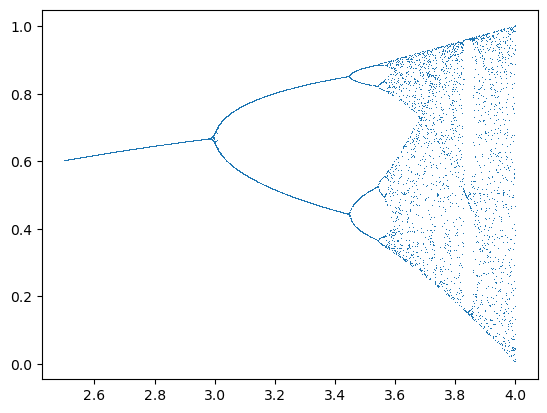

In [14]:
X=[]
Y=[]
for r in R:
    X.append(r)
    x=np.random.random()#initialize x for each r value
    for n in range(100):
        x=r*x*(1-x)
    for n in range(100):
        x=r*x*(1-x)
    Y.append(x)
    
plt.plot(X,Y,ls='',marker=',')
plt.show() 

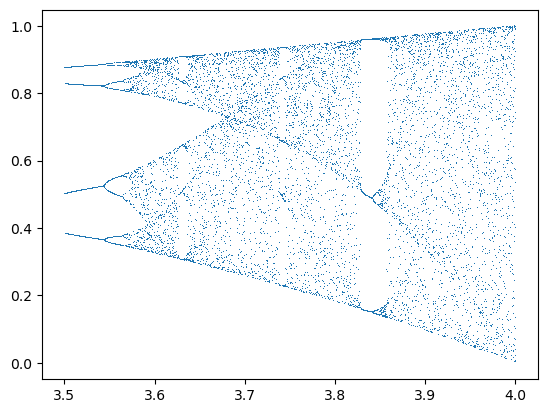

In [15]:
R=np.linspace(3.5,4,10000)#for better view
X=[]
Y=[]
for r in R:
    X.append(r)
    x=np.random.random()#initialize x for each r value
    for n in range(100):
        x=r*x*(1-x)
    for n in range(100):
        x=r*x*(1-x)
    Y.append(x)
    
plt.plot(X,Y,ls='',marker=',')
plt.show() 

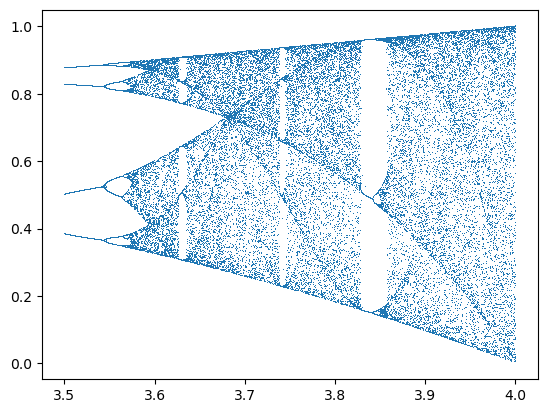

In [16]:
R=np.linspace(3.5,4,40000)#for better view
X=[]
Y=[]
for r in R:
    X.append(r)
    x=np.random.random()#initialize x for each r value
    for n in range(100):
        x=r*x*(1-x)
    for n in range(100):
        x=r*x*(1-x)
    Y.append(x)
    
plt.plot(X,Y,ls='',marker=',')
plt.show()

Can be used for any 1-D graph

# Lyaponov exponent(ate of separation of infinitely close points)

Lyapunov exponent(r vs LE)
Logistic map: r=rx(1-x)

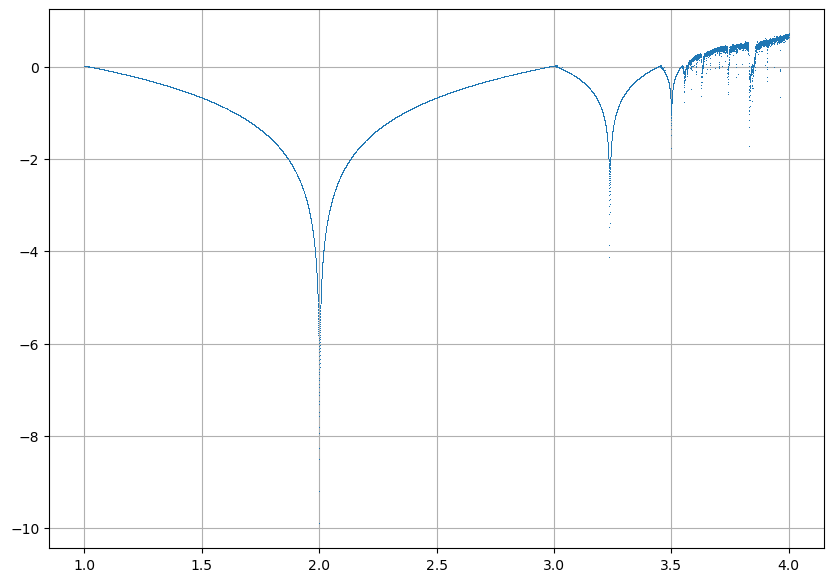

In [17]:
import matplotlib.pyplot as plt
import numpy as np
R=np.linspace(1,4,20000)#X axis-control parameter range
#specify the total number of points you want in the array, and NumPy will calculate the spacing between the numbers automatically
LE=[]#Y axis-Lyaponov exponent
result=[] 
#Generate x for each value of r
for r in R:
    x=np.random.random()
    for n in range(100):#ignore the
        x=r*x*(1-x)
    result=[]
    for n in range(100):
        x=r*x*(1-x)
        #calculate the log of the absolute of the derivative
        result.append(np.log(abs(r-2*r*x)))
    LE.append(np.mean(result))#average
plt.figure(figsize=(10,7))
plt.grid('on')
plt.plot(R,LE,ls='',marker=',',alpha=1)
plt.show()

1st bifurcation is going at r=2, dips shows that its going through bifurcation.
can be used for any 1-D chaotic map

# Pseudo random number generator with Zaslavsky map


2-D Discrete-time dynnamical system


In [18]:
import math

In [19]:
#large application in caotic system related to randomness. can withstand BRUTE-FORCE ATTACK
def ZaslavaskyMap_PRNG(x,y,r,v,e,size):
    prn1=pnr2=pnr3=pnr4=0
    x1=y1=0
    u=(1-pow(e,-r))/r
    for i in range(size):
        x1=((x+v*(1+u*y)+e*v*u*math.cos(2*math.pi*x))%1)#chaotic value
        y1=pow(e,-r)*(y+e*math.cos(2*math.pi*x))
        print("\nChaotic values:",'\nx=',x1,'','\ny=',y1)
        x=x1
        y=y1
        
        #GENERATION of PRNG
        #METHOD1:Extract particular numbers from x1 or y1
        pnr1=x1*10000-math.floor(x1*10000)
        print('\nPNR1=',pnr1)
        
        #METHOD2,3 CONVERT IMAGE IN INTEGER
        #METHOD2:PRN for image encryption using XOR operation of pixel ranges from[0,255]
        pnr2=(math.floor(x1*(math.pow(2,35)-1)))%256
        print('PNR2=',pnr2)
        
        #METHOD3:PRNG for shuffling of pixel values pixel position ranges from[0,len/breadth]
        pnr3=int(math.floor(y1*(math.pow(2,20)-1)))%1024#let size of imzge is 1024
        print('PNR3=',pnr3)
        
        #METHOD4:PNR in binary form
        pnr4=("{0:b}".format(pnr3))
        print('PNR4-Binary form:',pnr4)
x=0.1
y=0.2
v=4#control parameter
e=2.3
r=3
size=2
ZaslavaskyMap_PRNG(x,y,r,v,e,size)



Chaotic values: 
x= 0.6218238826580738  
y= 0.16937117506882382

PNR1= 0.23882658073762286
PNR2= 190
PNR3= 446
PNR4-Binary form: 110111110

Chaotic values: 
x= 0.7995368854940197  
y= -0.12238875686156006

PNR1= 0.36885494019679754
PNR2= 56
PNR3= 690
PNR4-Binary form: 1010110010


# BAKER'S MAP

OBJECTIVE:  Generate chaotic map
generate keys in the range[0,255]
generate prime numbers with Baker's map

In [20]:
from math import sqrt

In [21]:
import math

def keygen(x, y, a, size):
    key = []
    key1 = []
    xkey = []
    ykey = []

    for i in range(size):
        if 0 <= x <= 0.5:
            x = 2 * x
            y = a * y
        elif 0.5 < x <= 1.0:
            x = 2 * x - 1
            y = a * y + 0.5

        # Append to xkey and ykey instead of x.key and y.key
        xkey.append(x)
        ykey.append(y)

        # Generate encryption keys in range [0, 255]
        key.append(int((x * pow(10, 3)) % 256))
        key1.append(int((x * pow(10, 6)) % 256))

    return xkey, ykey, key, key1

def selectPrime(n):
    primeno = 0  # Flag to check if the number is prime
    p = 0

    if n > 1:
        for i in range(2, int(math.sqrt(n)) + 1):  # Fix sqrt() usage
            if n % i == 0:
                primeno = 1
                break
        if primeno == 0:
            p = n  # Assign prime number
    return p

if __name__ == "__main__":
    xkey, ykey, key, key1 = keygen(0.18, 0.91, 0.142, 10)

    print('Chaotic values x:', xkey)
    print('Chaotic values y:', ykey)
    print('\nx Key:', key)  # x-value
    print('\ny Key1:', key1)  # y-value

    # Generate prime numbers from this key
    print('\nPrime numbers in x:')
    for i in key:
        p = selectPrime(i)
        if p != 0:
            print(p)

    print('\nPrime numbers in y:')
    for i in key1:
        p = selectPrime(i)
        if p != 0:
            print(p)


Chaotic values x: [0.36, 0.72, 0.43999999999999995, 0.8799999999999999, 0.7599999999999998, 0.5199999999999996, 0.03999999999999915, 0.0799999999999983, 0.1599999999999966, 0.3199999999999932]
Chaotic values y: [0.12922, 0.01834924, 0.50260559208, 0.07136999407535999, 0.5101345391587011, 0.5724391045605356, 0.581286352847596, 0.08254266210435862, 0.011721058018818923, 0.001664390238672287]

x Key: [104, 208, 183, 111, 247, 7, 39, 79, 159, 63]

y Key1: [64, 128, 191, 127, 191, 63, 63, 127, 255, 255]

Prime numbers in x:
7
79

Prime numbers in y:
191
127
191
127


# JSMP MAP

It is chaotic for a large range 0.502 to 2000
highly sensitive to even minjte changes in contol parameter and initial conditions.
It generates a strong encrypted images. leading to high reliability